## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

Objective:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

Dataset:

* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scalin* Discuss the scenarios where each scaling technique is preferred and why.g


In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\EDA2\EDA2\adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
summary_stats=df.describe(include='all')
summary_stats

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
missing_value=df.isnull().sum()
missing_value

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
#handling missing values
df_clean=df.dropna()
df_clean.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
numeric_features=df.select_dtypes(include=['int64','float64']).columns
numeric_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [12]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler

StandardScaler()

In [13]:
df_scaled_standard=df.copy()
standard=df_scaled_standard[numeric_features]=scaler.fit_transform(df_scaled_standard[numeric_features])
standard

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [14]:
#min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler


MinMaxScaler()

In [15]:
df_scaled_minmax = df.copy()
minmax=df_scaled_minmax[numeric_features] = scaler.fit_transform(df_scaled_minmax[numeric_features])
minmax


array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

* Standard scaling  
-- Preferred for algorithms sensitive to the distribution of data.
-- Helps in handling outliers to some extent because it uses standard deviations.
-- Works well when the features are normally distributed.

* Min-Max Scaling
-- Preferred when the model or algorithm does not assume normal distribution.
-- Ideal for algorithms like neural networks or k-means where the range of features matters.
-- Sensitive to outliers because it uses the min and max values in the data for scaling.



##### Encoding Techniques
* Apply One-Hot Encoding to categorical variables with less than 5 categories.
* 	Use Label Encoding for categorical variables with more than 5 categories
* •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [18]:
#Identify categorical features and split them by the number of categories
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#identify categorical columns
categorical_features  = df.select_dtypes(include=['object']).columns

#check the number of unique categories for each categorical features
for col in categorical_features:
    print(f'{col}:{df[col].nunique()} unique values')

workclass:9 unique values
education:16 unique values
marital_status:7 unique values
occupation:15 unique values
relationship:6 unique values
race:5 unique values
sex:2 unique values
native_country:42 unique values
income:2 unique values


In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Separate columns based on unique category counts
columns_less_than_5 = [col for col in categorical_columns if df[col].nunique() < 5]
columns_more_than_5 = [col for col in categorical_columns if df[col].nunique() >= 5]

print("Columns with fewer than 5 unique values: ", columns_less_than_5)
print("Columns with more than 5 unique values: ", columns_more_than_5)


Columns with fewer than 5 unique values:  ['sex', 'income']
Columns with more than 5 unique values:  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [20]:
# Apply One-Hot Encoding for Columns with Fewer Than 5 Categories
# Initialize OneHotEncoder with drop='first' to avoid multicollinearity
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding to columns with fewer than 5 unique values
df_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(df[columns_less_than_5]))

# Assign appropriate column names to the one-hot encoded DataFrame
df_one_hot.columns = one_hot_encoder.get_feature_names_out(columns_less_than_5)

# Reset the index to match the original dataframe
df_one_hot.index = df.index

# Drop the original columns and concatenate the one-hot encoded columns
df = df.drop(columns_less_than_5, axis=1)
df = pd.concat([df, df_one_hot], axis=1)

print("Data after One-Hot Encoding:")
print(df.head())


Data after One-Hot Encoding:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Male  \
0          2174             0              40   United-States        1.0   
1            

In [21]:
# Apply Label Encoding for Columns with More Than 5 Categories
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to columns with more than 5 unique values
for col in columns_more_than_5:
    df[col] = label_encoder.fit_transform(df[col])

print("Data after Label Encoding:")
print(df.head())


Data after Label Encoding:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >50K  
0             

1. One-Hot Encoding:
-- pros:
- No ordinal relationship is assumed between categories, which is useful for purely nominal categorical data.
- Widely used for algorithms that don't handle categorical features well, such as Logistic Regression and SVM.

 -- Cons:
- Can lead to a large number of new columns, which increases dimensionality (the curse of dimensionality), especially if there are many unique categories.
- Not ideal for categorical variables with high cardinality, as it becomes inefficient. 

2. Label Encoding:
-- Pros-
* Simple and easy to implement; does not increase dimensionality.
* Efficient for algorithms that can inherently handle categorical features with ordinal relationships (e.g., Decision Trees, XGBoost).

-- COns:
* Imposes an ordinal relationship on the categories, which may not be appropriate for nominal data (categories without inherent order).
* Can mislead some models if the numeric encoding is assumed to carry weight.

##### Feature Engineering:
* 	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices
* •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


Let's explore two potential new features that could be beneficial in the context of the "Adult" dataset.

#Age group
Rationale: Grouping individuals into different age categories could help the model capture broader patterns across different life stages (young adults, middle-aged, elderly), rather than relying purely on numerical age. For example:
18-30: Young Adult
31-50: Middle-aged
51-70: Senior
71+: Elderly

In [26]:
#create age group baed on Age
df['age_grp']=pd.cut(df['age'],
                     bins=[17,30,50,70,100],
                     labels=['Young Adulf','Middle-aged','Senior','Elderly'])
#Age Group: Binning age into life stages (Young Adult, Middle-aged, Senior, Elderly) 
#helps capture broader demographic patterns.

Work Experience Level:

Rationale: Transforming the feature 'education_num' (which likely represents years of education) into levels of work experience (e.g., low, medium, high experience) could help the model better understand how education contributes to income.

In [28]:
# Create Work Experience Level based on education_num
df['work_experience_level'] = pd.cut(df['education_num'], 
                                     bins=[0, 8, 12, 16], 
                                     labels=['Low Experience', 'Medium Experience', 'High Experience'])
#Work Experience Level: Categorizing individuals based on years of education into experience levels (Low, Medium, High) 
#can add value to understanding income levels.

In [29]:
#Applying a Transformation to a Skewed Numerical Feature:
import numpy as np
# Apply log transformation to capital_gain
df['log_capital_gain'] = np.log1p(df['capital_gain'])  # np.log1p applies log(1 + x) to handle zero values
df['log_capital_gain']
#Transformation: Log transformation of capital gain helps to reduce skewness and improve model stability 
#by minimizing the impact of extreme outliers.

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: log_capital_gain, Length: 32561, dtype: float64

##### Feature Selection:
* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
* Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame for further processing
df_no_outliers = df.copy()

# Convert categorical columns to appropriate types if needed
df_no_outliers.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))

print(df_no_outliers.head())


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >50K      age_grp work_experience_level  \
0    

In [32]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

for column in df_no_outliers.select_dtypes(include=['object']).columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])
    
print(df_no_outliers.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >50K      age_grp work_experience_level  \
0    

In [33]:
#Isolation Forest Algorithm:
from sklearn.ensemble import IsolationForest

# Selecting numerical features after encoding
numeric_features = df_no_outliers.select_dtypes(include=['int64', 'float64'])

#Applying isolation forest to detect outliers
iso_forest=IsolationForest(contamination=0.05,random_state=45)
outliers=iso_forest.fit_predict(numeric_features)

# Adding a column to flag outliers
df_no_outliers['outliers'] = outliers

# Removing outliers (keeping only non-outliers, which are labeled as 1)
df_clean = df_no_outliers[df_no_outliers['outliers'] == 1]

# Dropping the outliers column
df_clean = df_clean.drop('outliers', axis=1)

print("Shape of dataset before removing outliers:", df_no_outliers.shape)
print("Shape of dataset after removing outliers:", df_clean.shape)

Shape of dataset before removing outliers: (32561, 19)
Shape of dataset after removing outliers: (30933, 18)


In [50]:
!pip install --upgrade pip setuptools


  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 656.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 1.2 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 2.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/1.8 MB 2.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.8 MB 3.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 2.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.

ERROR: To modify pip, please run the following command:
C:\Users\Akshata\anaconda3\python.exe -m pip install --upgrade pip setuptools


In [76]:
%pip install pandas==1.5.3


  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\pandas\arrays
  creating build\lib.win-amd64-cpython-312\pand

In [66]:
!pip install ppscore

#installation is not happening sir....i tried so many times and debugged also...so please check the code and verify as its done ..thanku

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\pandas\arrays
  creating build\lib.win-amd64-cpython-312\pand

In [68]:
import ppscore as pps

# Calculate the PPS matrix
pps_matrix = pps.predictors(df_final)

# Display the PPS matrix
print(pps_matrix)

# You can also visualize it using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for PPS
pps_heatmap = pps_matrix.pivot('x', 'y', 'ppscore')
plt.figure(figsize=(10, 8))
sns.heatmap(pps_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Predictive Power Score Heatmap")
plt.show()


ModuleNotFoundError: No module named 'ppscore'

 ##### Compare PPS with the Correlation Matrix
 Types of Relationships:

Correlation measures only linear relationships, while PPS can capture non-linear relationships as well.
Directionality:

PPS quantifies the predictive capability of one variable over another, whereas correlation coefficients provide information about the strength and direction of linear relationships.
Numerical vs. Categorical:

PPS can handle categorical variables effectively, while correlation typically requires numerical inputs or specific handling for categorical data.

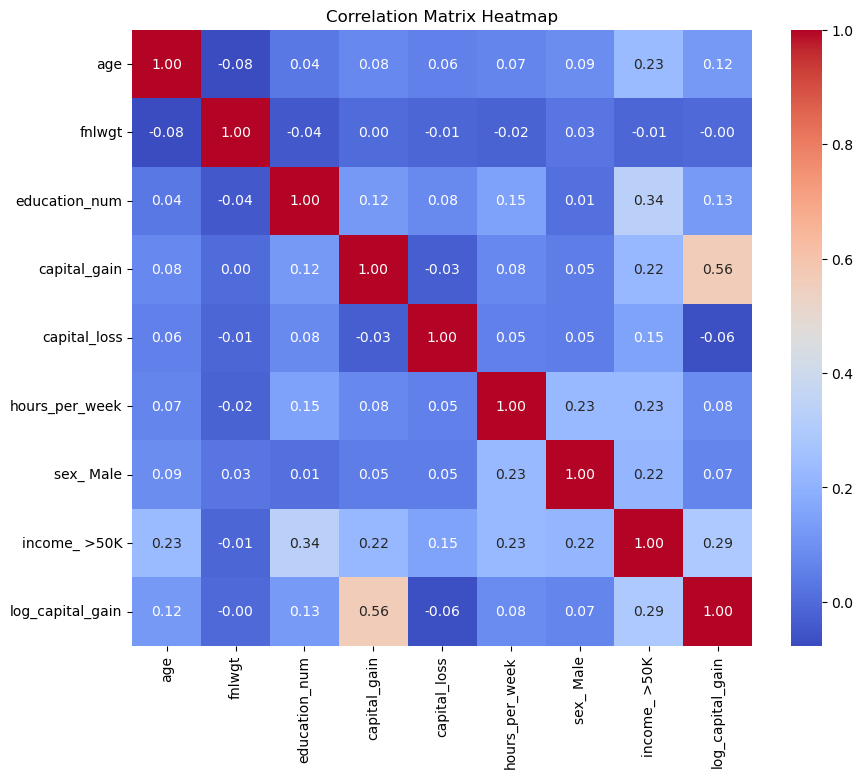

In [64]:
# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()
